# Mnist dataset.

In [29]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Keras.
from keras.datasets import mnist
from keras.utils import to_categorical

## 1. Load the dataset

In [30]:
# Load the dataset.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set the number of classes.
num_classes = np.max(y_train) + 1

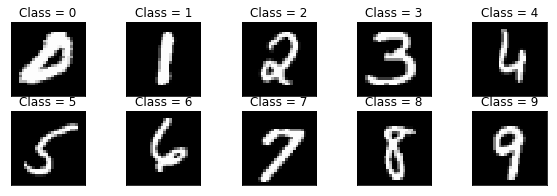

In [31]:
# Display an image for each class.
fig = plt.figure(figsize=(10,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:] == i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    plt.imshow(im, cmap="gray")
    plt.title("Class = {}".format(i))
plt.show()

## 2. Handle data.

In [41]:
# Reshape as channel first.
size_tr = x_train.shape
size_te = x_test.shape
x_tr = x_train.reshape(size_tr[0], 1, size_tr[1], size_tr[2])
x_te = x_test.reshape(size_te[0], 1, size_te[1], size_te[2])

# Process the images.
x_tr = x_tr / 255
x_te = x_te / 255

# Display the images size.
print("y_tr size = {}".format(x_tr.shape))
print("y_te size = {}".format(x_te.shape))

y_tr size = (60000, 1, 28, 28)
y_te size = (10000, 1, 28, 28)


In [42]:
# Process the classes.
y_tr = to_categorical(y_train, num_classes)
y_te = to_categorical(y_test, num_classes)

# Display the classes size.
print("y_tr size = {}".format(y_tr.shape))
print("y_te size = {}".format(y_te.shape))

y_tr size = (60000, 10)
y_te size = (10000, 10)


## 3. Model.

In [52]:
import keras
from keras import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

In [ ]:
# Build the model.
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation="relu",
                 data_format="channels_first",
                 input_shape=(1, 28, 28)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Parameter fitting.
fit_params = {
    "batch_size": 128,
    "epochs": 10,
    "verbose": 1,
    "shuffle": True,
    "validation_data": (x_te, y_te)
}

# Fit the model.
history = model.fit(x_tr, y_tr, **fit_params)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2511 - acc: 0.9211 - val_loss: 0.1289 - val_acc: 0.9600
Epoch 2/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0705 - acc: 0.9775 - val_loss: 0.0663 - val_acc: 0.9773
Epoch 3/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0462 - acc: 0.9850

In [ ]:
# Visualise the resuls.
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history["loss"], color="b", label="tr")
plt.plot(history.history["val_loss"], color="r", label="te")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.subplot(122)
plt.plot(history.history["acc"], color="b", label="tr")
plt.plot(history.history["val_acc"], color="r", label="te")
plt.ylabel("acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

## Evaluation.

In [ ]:
# Get the prediction of the model for the test set.
y_pred = model.predict(x_te)